Plot the correlation plots and save 

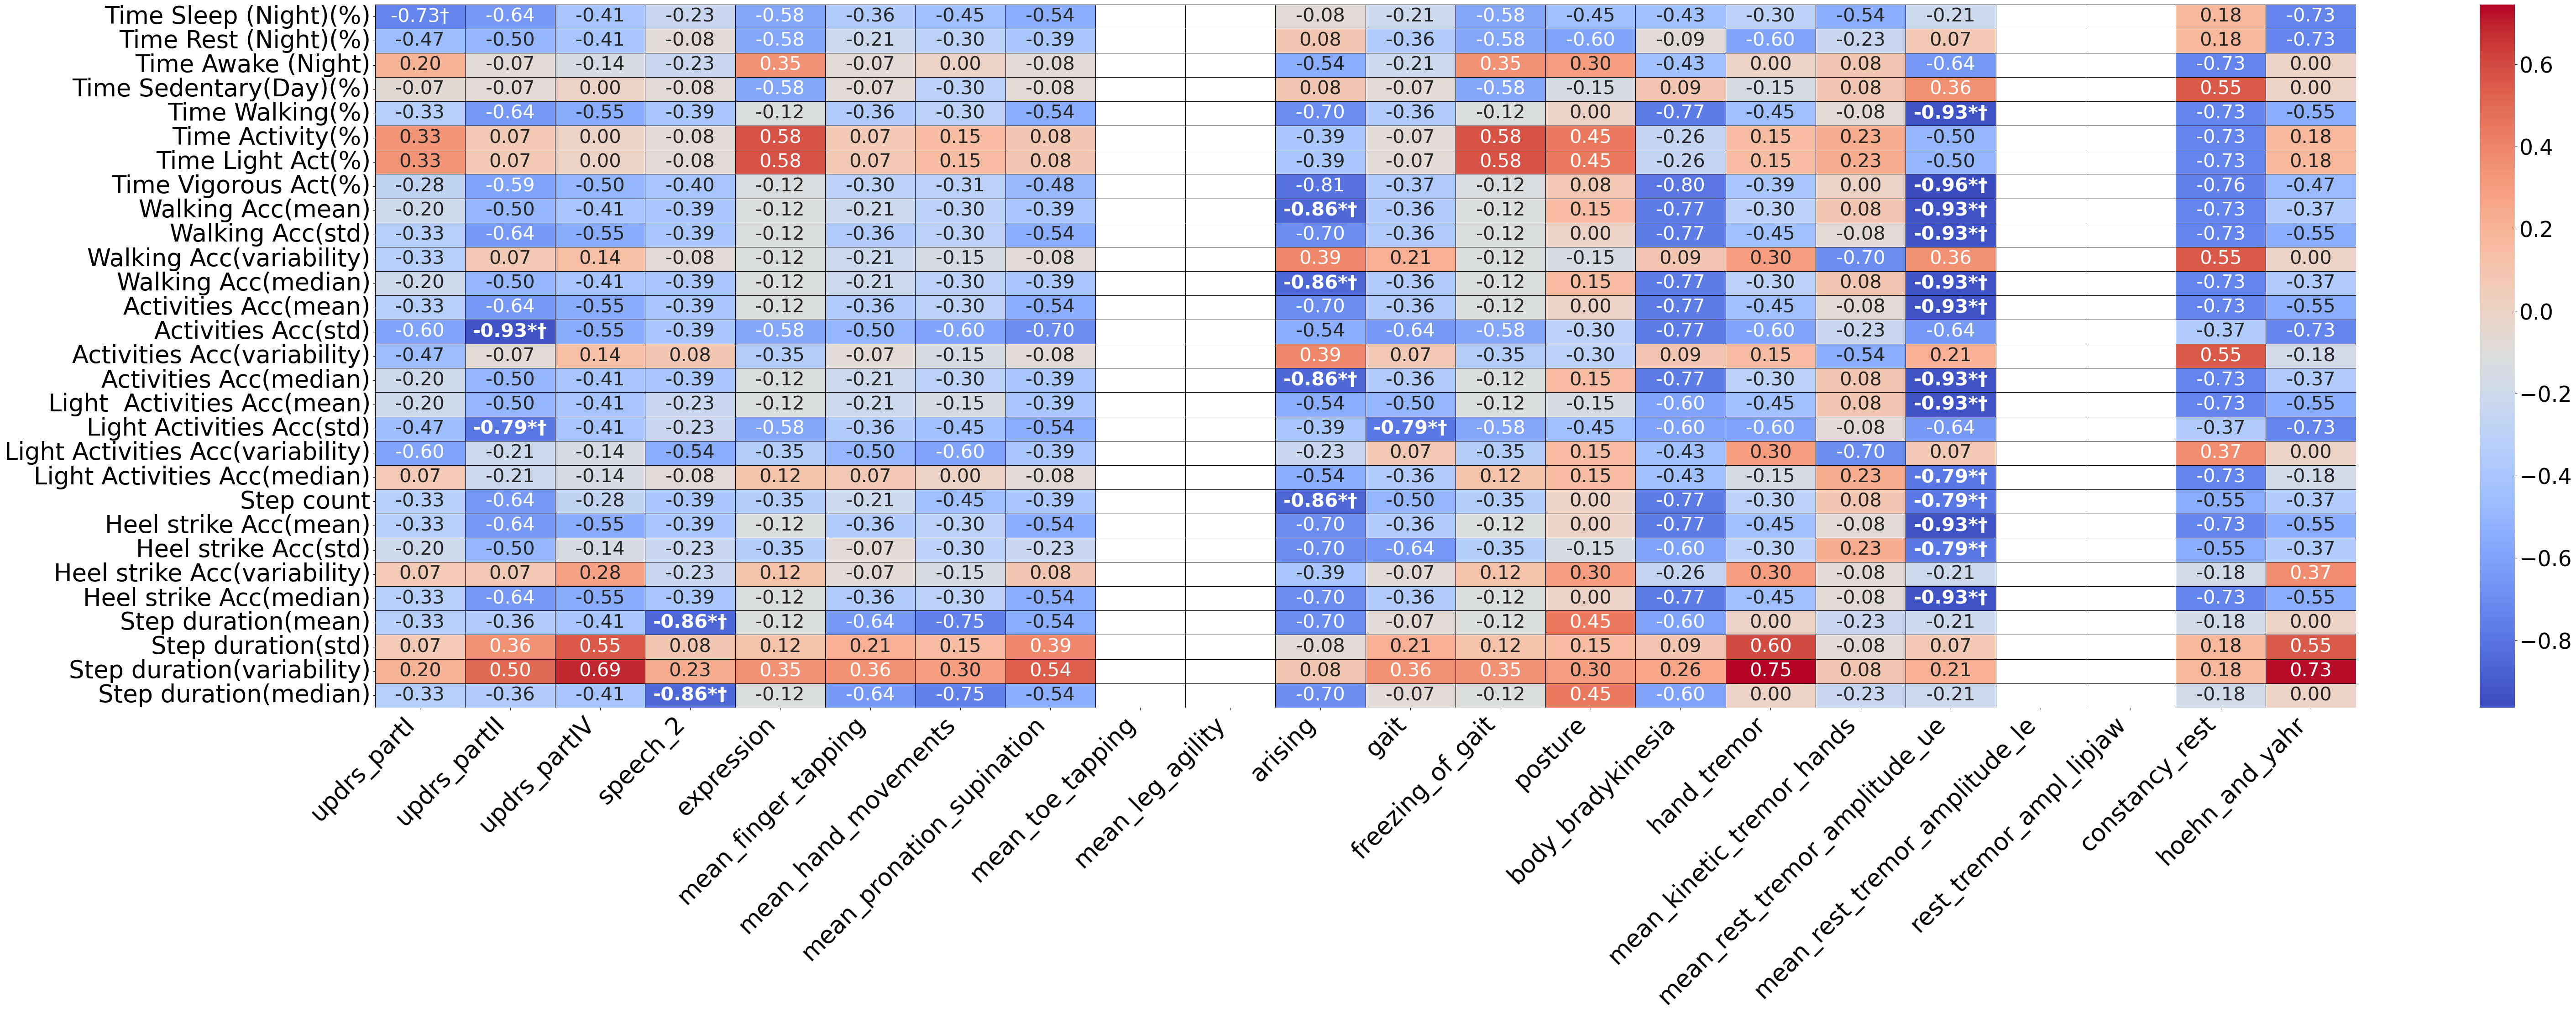

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import os

PosSel='Wrist' # position of 
scaleName='Paper' # updrs'Total'
fontsize1=38 # font in correlation figure
SaveFigureTitle=(os.path.join('results', 'CorrelationMap'+ PosSel + scaleName))# define filename for saving 

#-------------------------------------------------------
# Step 1: Read the .mat file
MatlabData= scipy.io.loadmat(os.path.join('results', PosSel +'Kendall' + '_' + scaleName + '.mat'))
df = pd.DataFrame(MatlabData['values'])
p_values_df = pd.DataFrame(MatlabData['pvalues'])
MatlabData= scipy.io.loadmat(os.path.join('results', PosSel + 'Spearman' + '_' + scaleName + '.mat'))
p_values_dfsp = pd.DataFrame(MatlabData['pvalues'])


# Step 2: Get the custom annotations
# helper function: Create a custom annotation function
def custom_annotation(data, p_values,p_values2):
    annotations = data.copy().astype(str)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            value = f"{data.iloc[i, j]:.2f}"
            if p_values.iloc[i, j] < 0.01:
                value += '**'
            elif p_values.iloc[i, j] < 0.05:
                value += '*'           
                
            if p_values2.iloc[i, j] < 0.01:
                value = f"{value}††"
            elif p_values2.iloc[i, j] < 0.05:
                value = f"{value}†"        
            annotations.iloc[i, j] = value
            
    return annotations
annotations = custom_annotation(df, p_values_df,p_values_dfsp)

# Step 3: Plot the heatmap
if PosSel=='Wrist':
    plt.figure(figsize=(70,20))
elif PosSel=='Body':
    plt.figure(figsize=(70,20))

heatmap = sns.heatmap(df, annot=annotations, annot_kws={'fontsize':fontsize1-8,'horizontalalignment': 'center', 'verticalalignment': 'center'}, fmt='', cmap="coolwarm", cbar=True, linewidths=.5, linecolor='black')
# Change the color bar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=fontsize1-4)  # Set the color bar font size

# Step 4: Manually adjust the font weight of significant annotations
for t in heatmap.texts:
    if '*' in t.get_text():
        t.set_weight('bold')
        
if scaleName == 'Paper':
    ScaleName =  ["updrs_partI","updrs_partII","updrs_partIV","speech_2","expression","mean_finger_tapping","mean_hand_movements","mean_pronation_supination","mean_toe_tapping","mean_leg_agility","arising","gait","freezing_of_gait","posture","body_bradykinesia","hand_tremor","mean_kinetic_tremor_hands","mean_rest_tremor_amplitude_ue","mean_rest_tremor_amplitude_le","rest_tremor_ampl_lipjaw","constancy_rest","hoehn_and_yahr"]        

if PosSel=='Wrist':
    if scaleName =='Total':
        ScaleName = pd.read_excel(os.path.join('clinicalScales', 'ClinicalScales.xlsx'), sheet_name='Other_WRIST')
        ScaleName = ScaleName['Scale'].tolist()
    if scaleName =='UPDRS':
        ScaleName = pd.read_excel(os.path.join('clinicalScales', 'ClinicalScales.xlsx'), sheet_name='UPDRS_WRIST')#
        ScaleName = ScaleName['Scale'].tolist()
    # Set custom x-axis and y-axis labels
    heatmap.set_xticklabels(ScaleName, fontsize = fontsize1)
    heatmap.set_yticklabels(["Time Sleep (Night)(%)","Time Rest (Night)(%)","Time Awake (Night)","Time Sedentary(Day)(%)","Time Walking(%)","Time Activity(%)","Time Light Act(%)","Time Vigorous Act(%)","Walking Acc(mean)","Walking Acc(std)","Walking Acc(variability)","Walking Acc(median)","Activities Acc(mean)","Activities Acc(std)","Activities Acc(variability)","Activities Acc(median)","Light  Activities Acc(mean)","Light Activities Acc(std)","Light Activities Acc(variability)","Light Activities Acc(median)","Step count","Heel strike Acc(mean)","Heel strike Acc(std)","Heel strike Acc(variability)","Heel strike Acc(median)","Step duration(mean)","Step duration(std)","Step duration(variability)","Step duration(median)"], fontsize=fontsize1)

elif PosSel=='Body':
    if scaleName =='Total':
        ScaleName = pd.read_excel(os.path.join('clinicalScales', 'ClinicalScales.xlsx'), sheet_name='Other_TRUNK')
        ScaleName = ScaleName['Scale'].tolist()
    if scaleName =='UPDRS':
        ScaleName =  ["cognitive","hallucinations","depressed","anxious","apathy","dopamine","sleep_problems","day_sleep","pain_sensations","urinary","constipation","light_head","fatigue","speech","saliva","chewing","eating","dressing","hygiene","handwriting","hobbies","turning","tremor","getting_up","walking","freezing","speech_2","expression","mean_figuer_tapping","mean_hand_movements","mean_pronation_supination","mean_toe_tapping","mean_leg_agility","arising","posture","body_bradykinesia","hand_tremor","mean_kinetic_tremor_hands","mean_rest_tremor_amplitude_ue","rest_tremor_ampl_lipjaw","constancy_rest","time_with_dyskinesia","function_dyskinesias","time_in_offstate","functional_fluctuations","complexity_fluctuations","painful_offstate_dys"]
        
    heatmap.set_xticklabels(ScaleName, fontsize = fontsize1)     
    heatmap.set_yticklabels(["Time Lying(Night)(%)","Time Lying(Day)(%)","Time Lying(%)","Time SitStand (%)","Time Walking(%)","Time Activities(%)","Walking Acc(mean)","Walking Acc(std)","Walking Acc(variability)","Walking Acc(median)","Activities Acc(mean)","Activities Acc(std)","Activities Acc(variability)","Activities Acc(median)","Step Count","Heel strike Acc(mean)","Heel strike Acc(std)","Heel strike Acc(variability)","Heel strike Acc(median)","Step duration(mean)","Step duration(std)","Step duration(variability)","Step duration(median)"], fontsize=fontsize1)
    
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=fontsize1)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=fontsize1)

plt.savefig(SaveFigureTitle, dpi=300, bbox_inches='tight')
plt.show()

In [13]:

ScaleName = pd.read_excel(os.path.join('clinicalScales', 'ClinicalScales.xlsx'), sheet_name='Other_TRUNKJ')

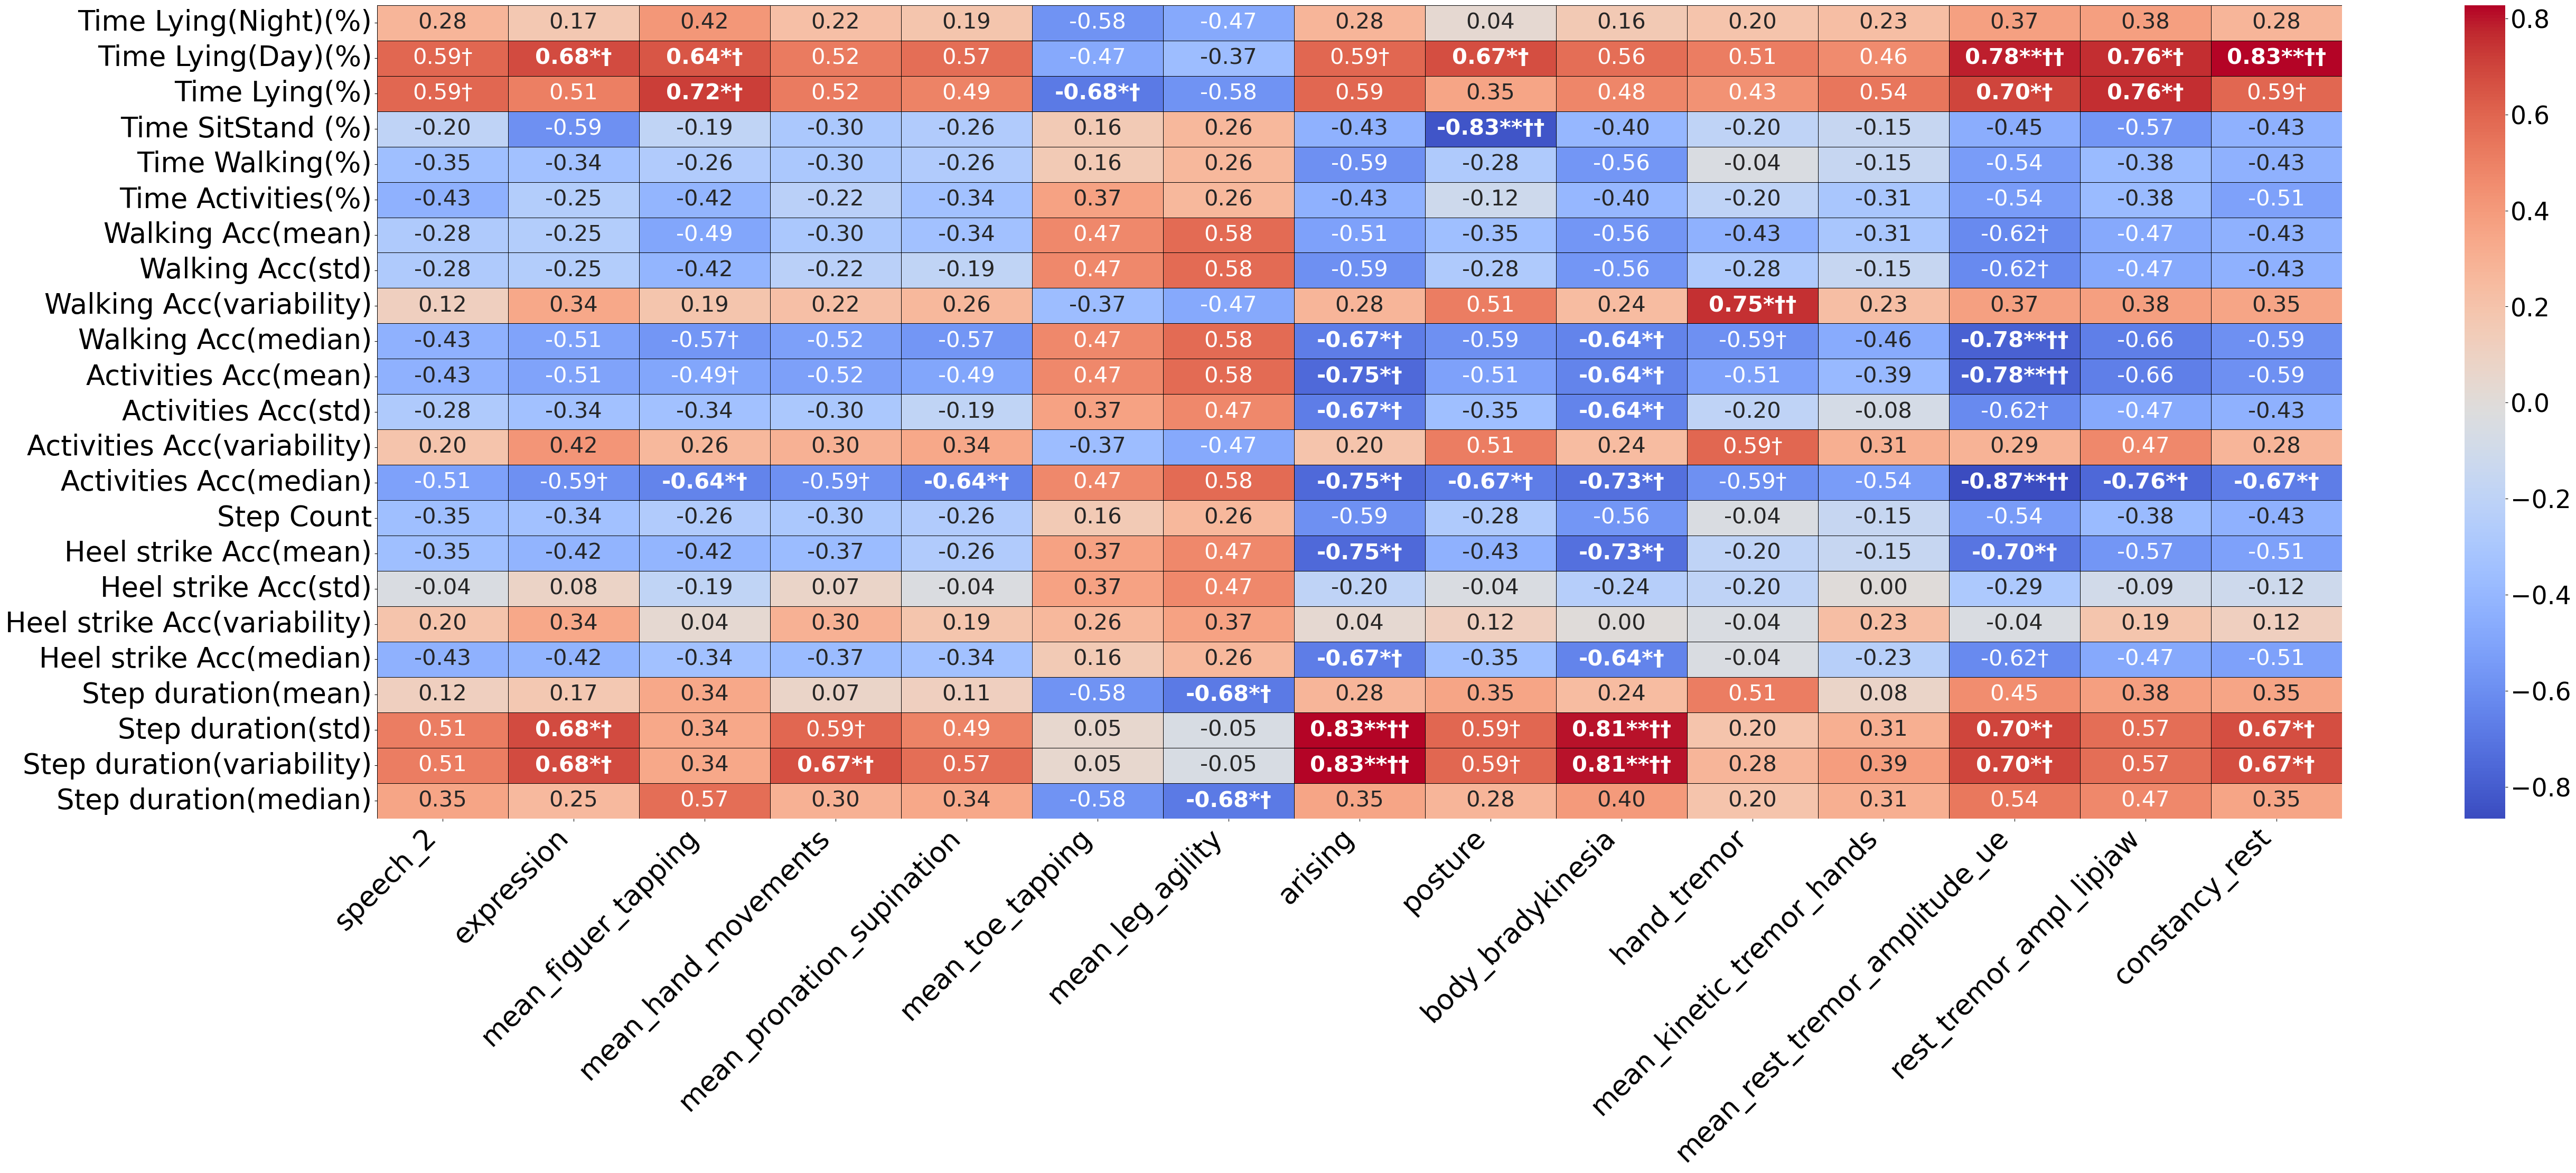

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import os

PosSel='Body' # position of  Wrist
scaleName='Paper' # updrs'Total'
cols = (26, 41)
fontsize1=38 # font in correlation figure
SaveFigureTitle=(os.path.join('results', 'CorrelationMap'+ PosSel + scaleName))# define filename for saving 

#-------------------------------------------------------
# Step 1: Read the .mat file
MatlabData= scipy.io.loadmat(os.path.join('results', PosSel +'Kendall' + '_' + scaleName + '.mat'))
df = pd.DataFrame(MatlabData['values'])
df = df.iloc[:, cols[0]: cols[1]]
p_values_df = pd.DataFrame(MatlabData['pvalues'])
p_values_df = p_values_df.iloc[:, cols[0]: cols[1]]
MatlabData= scipy.io.loadmat(os.path.join('results', PosSel + 'Spearman' + '_' + scaleName + '.mat'))
p_values_dfsp = pd.DataFrame(MatlabData['pvalues'])
p_values_dfsp = p_values_dfsp.iloc[:, cols[0]: cols[1]]


# Step 2: Get the custom annotations
# helper function: Create a custom annotation function
def custom_annotation(data, p_values,p_values2):
    annotations = data.copy().astype(str)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            value = f"{data.iloc[i, j]:.2f}"
            if p_values.iloc[i, j] < 0.01:
                value += '**'
            elif p_values.iloc[i, j] < 0.05:
                value += '*'           
                
            if p_values2.iloc[i, j] < 0.01:
                value = f"{value}††"
            elif p_values2.iloc[i, j] < 0.05:
                value = f"{value}†"        
            annotations.iloc[i, j] = value
            
    return annotations
annotations = custom_annotation(df, p_values_df,p_values_dfsp)

# Step 3: Plot the heatmap
if PosSel=='Wrist':
    plt.figure(figsize=(35,23))
elif PosSel=='Body':
    plt.figure(figsize=(60,20))

heatmap = sns.heatmap(df, annot=annotations, annot_kws={'fontsize':fontsize1-8,'horizontalalignment': 'center', 'verticalalignment': 'center'}, fmt='', cmap="coolwarm", cbar=True, linewidths=.5, linecolor='black')
# Change the color bar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=fontsize1-4)  # Set the color bar font size

# Step 4: Manually adjust the font weight of significant annotations
for t in heatmap.texts:
    if '*' in t.get_text():
        t.set_weight('bold')
        
if scaleName == 'Paper':
    ScaleName =  ["updrs_partI","updrs_partII","updrs_partIV","speech_2","expression","mean_finger_tapping","mean_hand_movements","mean_pronation_supination","mean_toe_tapping","mean_leg_agility","arising","gait","freezing_of_gait","posture","body_bradykinesia","hand_tremor","mean_kinetic_tremor_hands","mean_rest_tremor_amplitude_ue","mean_rest_tremor_amplitude_le","rest_tremor_ampl_lipjaw","constancy_rest","hoehn_and_yahr"]        

if PosSel=='Wrist':
    if scaleName =='Total':
        ScaleName = pd.read_excel(os.path.join('clinicalScales', 'ClinicalScales.xlsx'), sheet_name='Other_WRIST')
    if scaleName =='UPDRS':
        ScaleName = pd.read_excel(os.path.join('clinicalScales', 'ClinicalScales.xlsx'), sheet_name='UPDRS_WRIST')
    # Set custom x-axis and y-axis labels
    heatmap.set_xticklabels(ScaleName['Scale'].tolist(), fontsize = fontsize1)
    heatmap.set_yticklabels(["Time Sleep (Night)(%)","Time Rest (Night)(%)","Time Awake (Night)","Time Sedentary(Day)(%)","Time Walking(%)","Time Activity(%)","Time Light Act(%)","Time Vigorous Act(%)","Walking Acc(mean)","Walking Acc(std)","Walking Acc(variability)","Walking Acc(median)","Activities Acc(mean)","Activities Acc(std)","Activities Acc(variability)","Activities Acc(median)","Light  Activities Acc(mean)","Light Activities Acc(std)","Light Activities Acc(variability)","Light Activities Acc(median)","Step count","Heel strike Acc(mean)","Heel strike Acc(std)","Heel strike Acc(variability)","Heel strike Acc(median)","Step duration(mean)","Step duration(std)","Step duration(variability)","Step duration(median)"], fontsize=fontsize1)
elif PosSel=='Body':
    if scaleName =='Total':
        ScaleName = pd.read_excel(os.path.join('clinicalScales', 'ClinicalScales.xlsx'), sheet_name='Other_TRUNK')
        heatmap.set_xticklabels(ScaleName['Scale'].tolist(), fontsize = fontsize1)
    if scaleName =='UPDRS':
        ScaleName =  ["cognitive","hallucinations","depressed","anxious","apathy","dopamine","sleep_problems","day_sleep","pain_sensations","urinary","constipation","light_head","fatigue","speech","saliva","chewing","eating","dressing","hygiene","handwriting","hobbies","turning","tremor","getting_up","walking","freezing","speech_2","expression","mean_figuer_tapping","mean_hand_movements","mean_pronation_supination","mean_toe_tapping","mean_leg_agility","arising","posture","body_bradykinesia","hand_tremor","mean_kinetic_tremor_hands","mean_rest_tremor_amplitude_ue","rest_tremor_ampl_lipjaw","constancy_rest","time_with_dyskinesia","function_dyskinesias","time_in_offstate","functional_fluctuations","complexity_fluctuations","painful_offstate_dys"]
        heatmap.set_xticklabels(ScaleName[ cols[0]: cols[1]], fontsize = fontsize1)
        
    heatmap.set_yticklabels(["Time Lying(Night)(%)","Time Lying(Day)(%)","Time Lying(%)","Time SitStand (%)","Time Walking(%)","Time Activities(%)","Walking Acc(mean)","Walking Acc(std)","Walking Acc(variability)","Walking Acc(median)","Activities Acc(mean)","Activities Acc(std)","Activities Acc(variability)","Activities Acc(median)","Step Count","Heel strike Acc(mean)","Heel strike Acc(std)","Heel strike Acc(variability)","Heel strike Acc(median)","Step duration(mean)","Step duration(std)","Step duration(variability)","Step duration(median)"], fontsize=fontsize1)
    
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=fontsize1)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=fontsize1)

plt.savefig(SaveFigureTitle, dpi=300, bbox_inches='tight')
plt.show()




In [16]:
ActivityName = scipy.io.loadmat(os.path.join('Info', 'ActivityFeatureName.mat')) 
# List all variable names in the file
print(ActivityName.keys())

dict_keys(['__header__', '__version__', '__globals__', 'None', '__function_workspace__'])


C:\Users\zceeysu\AppData\Local\anaconda3\Lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
